In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
import torch.nn.functional as F
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split

In [ ]:
url = 'https://raw.githubusercontent.com/cihatkayack/Regresyon/main/Invistico_Airline.csv'
data = pd.read_csv(url)
data.head()

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,...,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,...,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,...,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,...,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,...,4,2,2,0,2,4,2,5,0,0.0


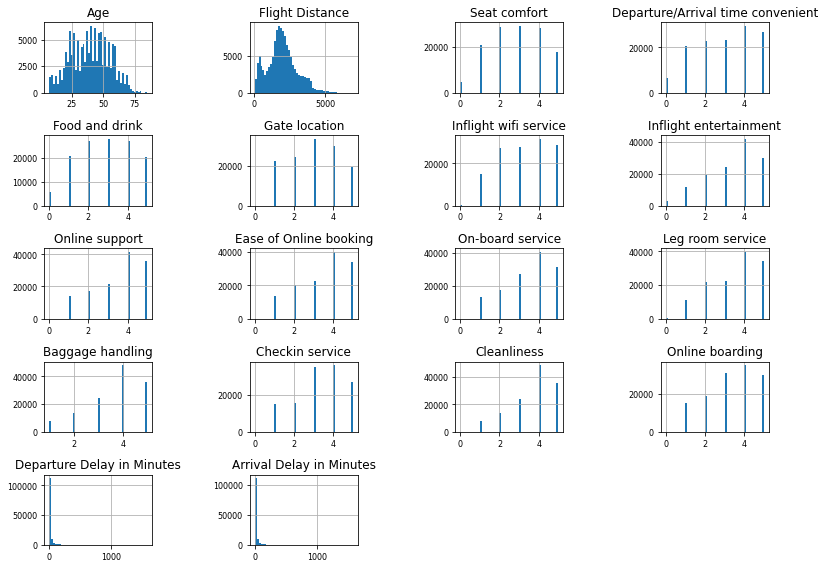

In [ ]:
data.hist(bins=50, xlabelsize = 8, ylabelsize = 8)
plt.tight_layout(rect=(0, 0, 2, 2))

In [ ]:
data.columns

Index(['satisfaction', 'Gender', 'Customer Type', 'Age', 'Type of Travel',
       'Class', 'Flight Distance', 'Seat comfort',
       'Departure/Arrival time convenient', 'Food and drink', 'Gate location',
       'Inflight wifi service', 'Inflight entertainment', 'Online support',
       'Ease of Online booking', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Cleanliness', 'Online boarding',
       'Departure Delay in Minutes', 'Arrival Delay in Minutes'],
      dtype='object')

In [ ]:
def label_encoding(column_name):
    label_encoder = LabelEncoder()
    data[column_name] = label_encoder.fit_transform(data[column_name])

In [ ]:
label_encoding("satisfaction")
label_encoding("Gender")
label_encoding("Customer Type")
label_encoding("Type of Travel")
label_encoding("Class")

In [ ]:
data.head()

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,1,0,0,65,1,1,265,0,0,0,...,2,3,3,0,3,5,3,2,0,0.0
1,1,1,0,47,1,0,2464,0,0,0,...,2,3,4,4,4,2,3,2,310,305.0
2,1,0,0,15,1,1,2138,0,0,0,...,2,2,3,3,4,4,4,2,0,0.0
3,1,0,0,60,1,1,623,0,0,0,...,3,1,1,0,1,4,1,3,0,0.0
4,1,0,0,70,1,1,354,0,0,0,...,4,2,2,0,2,4,2,5,0,0.0


In [ ]:
data.shape

(129880, 23)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   satisfaction                       129880 non-null  int64  
 1   Gender                             129880 non-null  int64  
 2   Customer Type                      129880 non-null  int64  
 3   Age                                129880 non-null  int64  
 4   Type of Travel                     129880 non-null  int64  
 5   Class                              129880 non-null  int64  
 6   Flight Distance                    129880 non-null  int64  
 7   Seat comfort                       129880 non-null  int64  
 8   Departure/Arrival time convenient  129880 non-null  int64  
 9   Food and drink                     129880 non-null  int64  
 10  Gate location                      129880 non-null  int64  
 11  Inflight wifi service              1298

In [ ]:
del data["Arrival Delay in Minutes"]
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 22 columns):
 #   Column                             Non-Null Count   Dtype
---  ------                             --------------   -----
 0   satisfaction                       129880 non-null  int64
 1   Gender                             129880 non-null  int64
 2   Customer Type                      129880 non-null  int64
 3   Age                                129880 non-null  int64
 4   Type of Travel                     129880 non-null  int64
 5   Class                              129880 non-null  int64
 6   Flight Distance                    129880 non-null  int64
 7   Seat comfort                       129880 non-null  int64
 8   Departure/Arrival time convenient  129880 non-null  int64
 9   Food and drink                     129880 non-null  int64
 10  Gate location                      129880 non-null  int64
 11  Inflight wifi service              129880 non-null  int64
 12  In

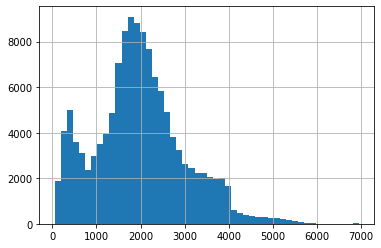

In [ ]:
data['Flight Distance'].hist(bins=50)

<ipython-input-313-eb63f8aec597>:2: DeprecationWarning:

`np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



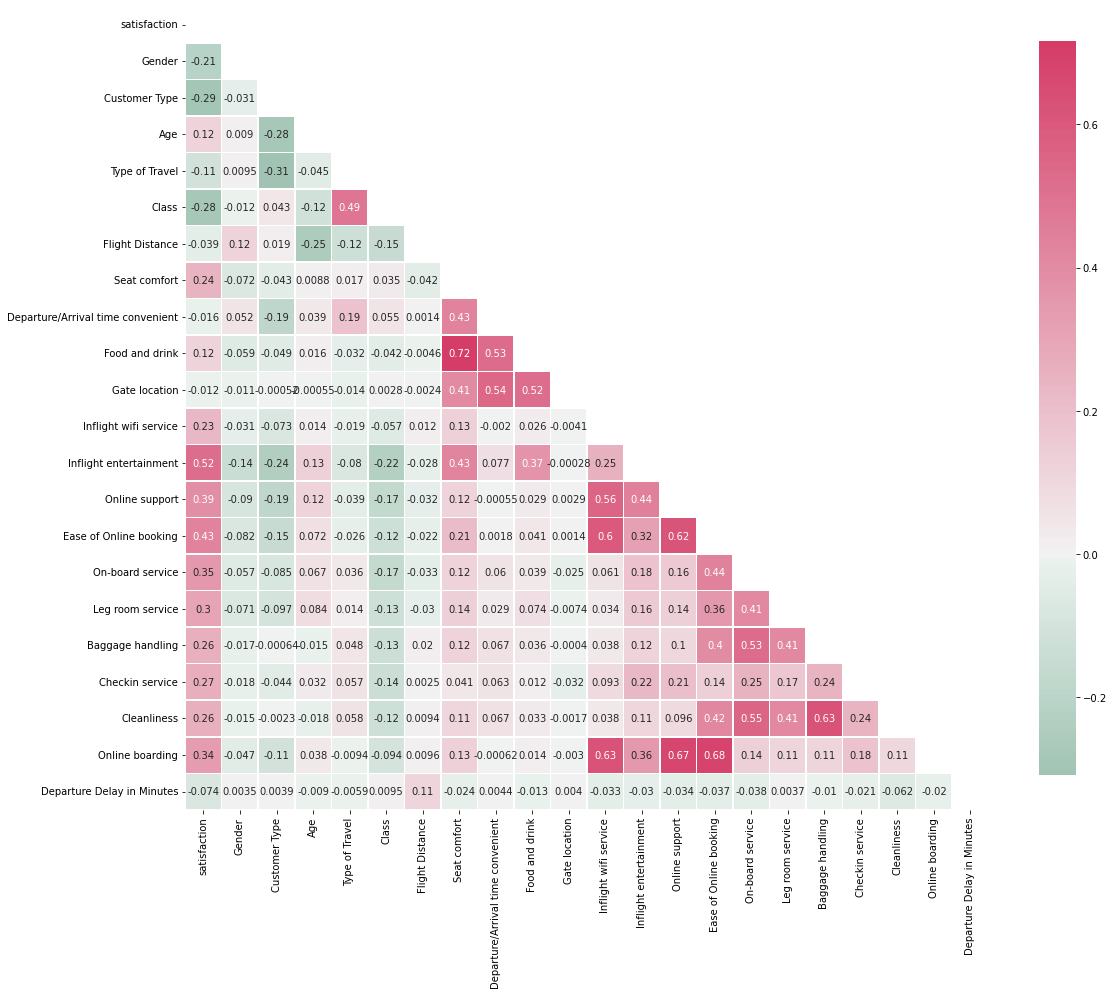

In [ ]:
corr = data.corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))
f, ax = plt.subplots(figsize=(18, 15))
cmap = sns.diverging_palette(150, 1, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=None, center=0,square=True, annot=True, linewidths=.5, cbar_kws={"shrink": .9});

In [ ]:
fig=px.pie(data,values=data["satisfaction"].value_counts(),
           names=["Satisfied","Dissatisfied"],title="<b>Satisfied And Dissatisfied Ratio",
           hole=.6,
       color_discrete_sequence=px.colors.qualitative.Pastel,template="plotly")
fig.update_layout(title_font_size=20)
fig.show()

In [ ]:
fig=px.violin(data,y="Age",x="Customer Type",color="satisfaction",title="<b>Age vs Customer Type vs satisfaction")
fig.update_layout(template="plotly")
fig.show()

In [ ]:
data.columns

Index(['satisfaction', 'Gender', 'Customer Type', 'Age', 'Type of Travel',
       'Class', 'Flight Distance', 'Seat comfort',
       'Departure/Arrival time convenient', 'Food and drink', 'Gate location',
       'Inflight wifi service', 'Inflight entertainment', 'Online support',
       'Ease of Online booking', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Cleanliness', 'Online boarding',
       'Departure Delay in Minutes'],
      dtype='object')

In [ ]:
x_predictor_col = ['Departure/Arrival time convenient','Inflight wifi service', 'Online support',
       'Ease of Online booking', 'On-board service', 'Checkin service', 'Cleanliness',
       'Food and drink']

In [ ]:
def create_plot_pivot(df, x_column):
    _df_plot = df.groupby([x_column, 'satisfaction']).size() \
    .reset_index().pivot(columns='satisfaction', index=x_column, values=0)
    return _df_plot

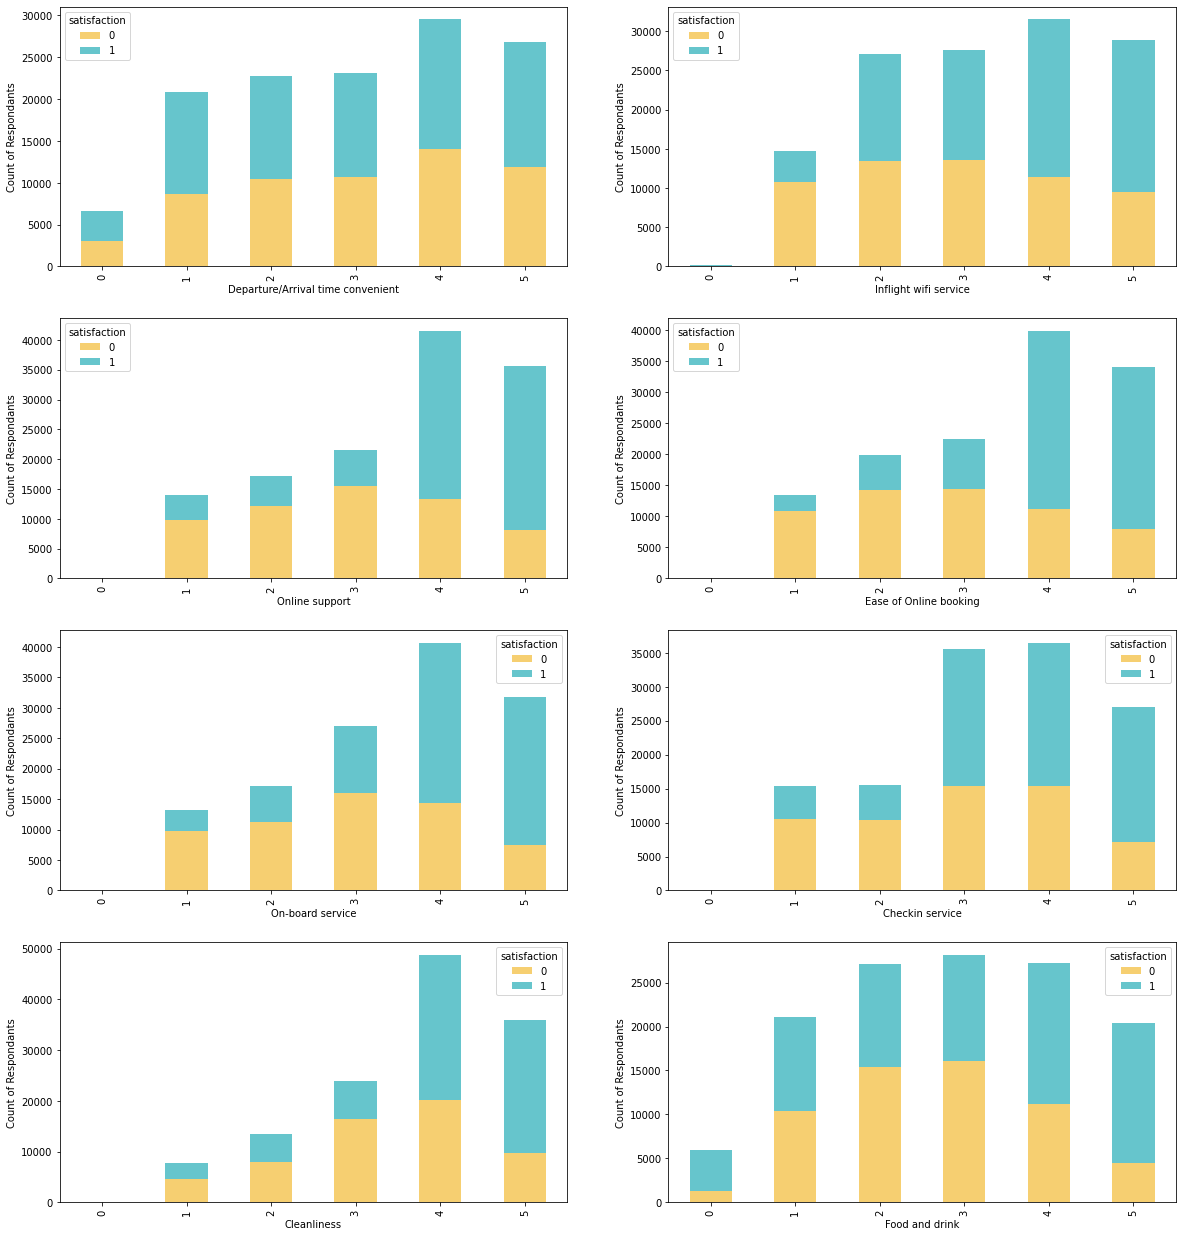

In [ ]:
fig, ax = plt.subplots(4,2 , figsize=(20,22))
axe = ax.ravel()

for i in range(0,8):
    create_plot_pivot(data, x_predictor_col[i]).plot(kind='bar',stacked=True, ax=axe[i],color=["#F6CF71","#66C5CC"])
    plt.xlabel(x_predictor_col[i])
    axe[i].set_ylabel('Count of Respondants')
fig.show()

In [ ]:
data.columns

Index(['satisfaction', 'Gender', 'Customer Type', 'Age', 'Type of Travel',
       'Class', 'Flight Distance', 'Seat comfort',
       'Departure/Arrival time convenient', 'Food and drink', 'Gate location',
       'Inflight wifi service', 'Inflight entertainment', 'Online support',
       'Ease of Online booking', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Cleanliness', 'Online boarding',
       'Departure Delay in Minutes'],
      dtype='object')

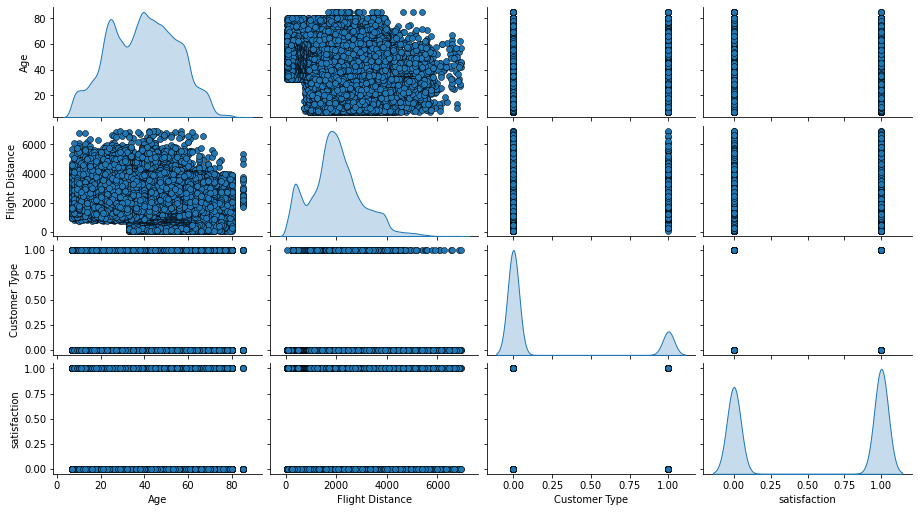

In [ ]:
#Age	Sex	ChestPainType	RestingBP	Cholesterol	FastingBS	RestingECG	MaxHR	ExerciseAngina	Oldpeak	ST_Slope	HeartDisease
ozellikler = ['Age','Flight Distance','Customer Type','satisfaction']
pp = sns.pairplot(data[ozellikler], height=1.8, aspect=1.8,plot_kws=dict(edgecolor="k", linewidth=0.5),diag_kind="kde", diag_kws=dict(shade=True))

# Model

In [ ]:
X  = data.drop("satisfaction", axis = 1)
y  = data["satisfaction"]

In [ ]:
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

In [ ]:
X_train[:5]

array([[1.        , 0.        , 0.48717949, 0.        , 0.        ,
        0.24721055, 0.6       , 0.6       , 0.6       , 0.6       ,
        0.8       , 1.        , 0.8       , 0.8       , 0.8       ,
        1.        , 0.75      , 0.6       , 0.8       , 0.8       ,
        0.        ],
       [0.        , 0.        , 0.11538462, 1.        , 1.        ,
        0.45558615, 0.4       , 0.4       , 0.8       , 0.4       ,
        0.8       , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 0.6       , 1.        , 0.8       ,
        0.        ],
       [1.        , 0.        , 0.26923077, 0.        , 0.        ,
        0.25199246, 0.6       , 0.6       , 0.6       , 0.6       ,
        1.        , 1.        , 1.        , 1.        , 0.6       ,
        0.6       , 1.        , 0.6       , 1.        , 1.        ,
        0.        ],
       [0.        , 0.        , 0.15384615, 1.        , 0.5       ,
        0.22257644, 0.8       , 0.8       , 0.8      

In [ ]:
X_train.shape

(103904, 21)

In [ ]:
y_train

112130    1
23501     1
122253    1
25404     1
127289    1
         ..
60620     1
121909    1
34086     0
58067     0
92975     1
Name: satisfaction, Length: 103904, dtype: int64

In [ ]:
y_train.shape

(103904,)

In [ ]:
class LogisticRegression(nn.Module):
  def __init__(self,num_features):
    super().__init__()
    self.linear = nn.Linear(num_features, 1)

  def forward(self,x):
    logits = self.linear(x)
    y_pred = torch.sigmoid(logits)
    return y_pred

In [ ]:
X_train.shape

(103904, 21)

In [ ]:
X_train.shape[1]

21

In [ ]:
class Invistico_Airline_Dataset(Dataset):

    def __init__(self,x,y):
        # Initialize data, download, etc.
        # read with numpy or pandas
        self.n_samples = x.shape[0]
        self.n_features = x.shape[1]
    
        # here the first column is the class label, the rest are the features
        self.x_data = torch.tensor(x, dtype=torch.float32)
        self.y_data = torch.tensor(y, dtype=torch.float32)

        

    # support indexing such that dataset[i] can be used to get i-th sample
    def __getitem__(self, index):
        return self.x_data[index], self.y_data[index]

    # we can call len(dataset) to return the size
    def __len__(self):
        return self.n_samples

In [ ]:
train_dataset = Invistico_Airline_Dataset(X_train, y_train)

In [ ]:
first_data = train_dataset[0]
features, labels = first_data
print(features, labels)

tensor([1.0000, 0.0000, 0.4872, 0.0000, 0.0000, 0.2472, 0.6000, 0.6000, 0.6000,
        0.6000, 0.8000, 1.0000, 0.8000, 0.8000, 0.8000, 1.0000, 0.7500, 0.6000,
        0.8000, 0.8000, 0.0000]) tensor(1.)


In [ ]:
train_loader = DataLoader(dataset=train_dataset,
                          batch_size=4,
                          shuffle=True,
                          num_workers=2)


In [ ]:
train_dataset.n_features

21

In [ ]:
torch.manual_seed(1)
model = LogisticRegression(num_features=train_dataset.n_features)
optimizer = torch.optim.SGD(model.parameters(), lr=0.05)

num_epochs = 5

for epoch in range(num_epochs):
    
    model = model.train()
    for batch_idx, (features, class_labels) in enumerate(train_loader):
        probas = model(features)
        loss = F.binary_cross_entropy(probas, class_labels.view(probas.shape))
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        ### LOGGING
        #print(f'Epoch: {epoch+1:03d}/{num_epochs:03d}'
         #      f' | Batch {batch_idx:03d}/{len(train_loader):03d}'
          #     f' | Loss: {loss:.2f}')

In [ ]:
def compute_accuracy(model, dataloader):

    model = model.eval()
    
    correct = 0.0
    total_examples = 0
    
    for idx, (features, class_labels) in enumerate(dataloader):
        
        with torch.no_grad():
            probas = model(features)
        
        pred = torch.where(probas > 0.5, 1, 0)
        lab = class_labels.view(pred.shape).to(pred.dtype)

        compare = lab == pred
        correct += torch.sum(compare)
        total_examples += len(compare)

    return correct / total_examples

In [ ]:
train_acc = compute_accuracy(model, train_loader)

In [ ]:
print(f"Accuracy: {train_acc*100}%")

Accuracy: 83.61756896972656%
